In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("flipkart_product.csv", encoding = "ISO-8859-1")

In [3]:
df.head()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product


In [4]:
df.isnull().sum()

ProductName     0
Price           1
Rate            1
Review          4
Summary        14
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

ProductName    0
Price          0
Rate           0
Review         0
Summary        0
dtype: int64

In [7]:
df.shape

(189857, 5)

In [8]:
#remove punctuations
import string
def rmv_punc(text):
    punct = string.punctuation
    return text.translate(str.maketrans('', '', punct))

In [9]:
df['Summary'] = df['Summary'].apply(lambda x: rmv_punc(x))
df['Price'] = df['Price'].apply(lambda x: rmv_punc(x))

In [10]:
df.head()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,5,Super!,Great cooler excellent air flow and for this p...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,5,Awesome,Best budget 2 fit cooler Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,1,Useless product,Very bad product its a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,3,Fair,Ok ok product


In [11]:
#remove character with undefined name
import re
def rmv_char(text):
    text = re.sub('[^a-zA-Z(/)]',' ', text)
    text = re.sub('\s+',' ', text) #remove whitespace
    return text

In [12]:
df['Summary'] = df['Summary'].apply(lambda x: rmv_char(x).lower())
df['Review'] = df['Review'].apply(lambda x: rmv_char(x).lower())
df['Price'] = df['Price'].apply(lambda x: rmv_char(x).lower())
df['ProductName']=df['ProductName'].apply(lambda x:rmv_char(x))

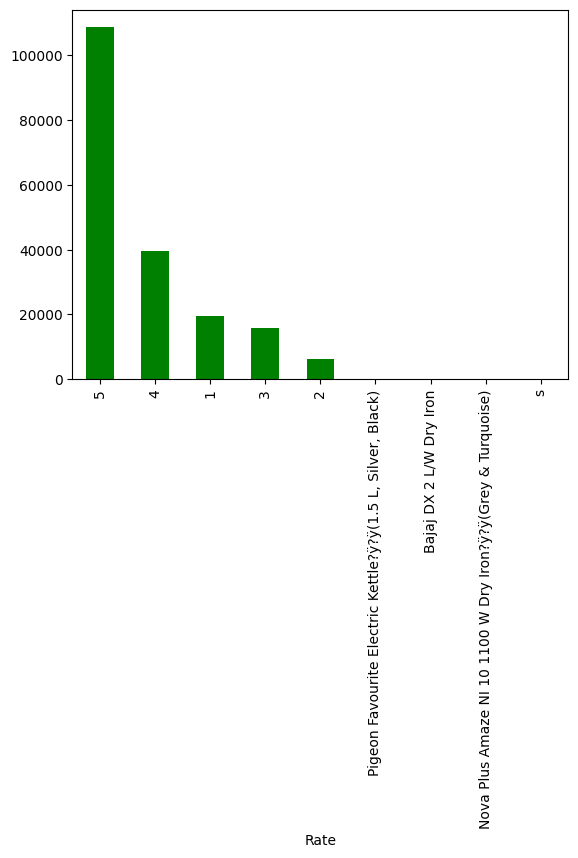

In [13]:
df['Rate'].value_counts().plot(kind='bar', color = 'green')
plt.show()

In [14]:
filtered_df = df[
    (df['Rate'] == '1') | (df['Rate'] == '2') | (df['Rate'] == '3') | (df['Rate'] == '4') | (df['Rate'] == '5')
]

In [15]:
filtered_df.head()

,ProductName,Price,Rate,Review,Summary
0,Candes L Room/Personal Air Cooler (White Black...,,5,super,great cooler excellent air flow and for this p...
1,Candes L Room/Personal Air Cooler (White Black...,,5,awesome,best budget fit cooler nice cooling
2,Candes L Room/Personal Air Cooler (White Black...,,3,fair,the quality is good but the power of air is de...
3,Candes L Room/Personal Air Cooler (White Black...,,1,useless product,very bad product its a only a fan
4,Candes L Room/Personal Air Cooler (White Black...,,3,fair,ok ok product


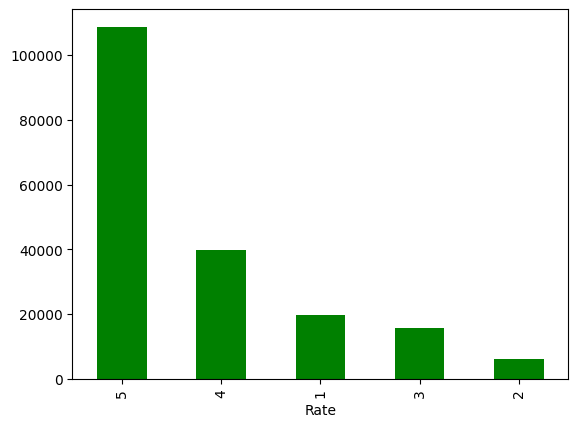

In [16]:
filtered_df['Rate'].value_counts().plot(kind='bar', color = 'green')
plt.show()

In [17]:
filtered_df.shape

(189853, 5)

In [18]:
df = filtered_df.iloc[:,2::2]

In [19]:
df.head()

,Rate,Summary
0,5,great cooler excellent air flow and for this p...
1,5,best budget fit cooler nice cooling
2,3,the quality is good but the power of air is de...
3,1,very bad product its a only a fan
4,3,ok ok product


In [20]:
df.duplicated().sum()

98223

In [21]:
df = df.drop_duplicates()

In [22]:
df.shape

(91630, 2)

In [23]:
df['Rate'] = df['Rate'].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91630 entries, 0 to 189866
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Rate     91630 non-null  int64 
 1   Summary  91630 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.1+ MB


In [25]:
conditions = [
    (df['Rate'] == 4) | (df['Rate'] == 5),
    (df['Rate'] == 3) | (df['Rate'] == 2),
    (df['Rate'] == 1)
]
sentiments = [1, 0, -1]
# 1 positive
# 0 neutral
# -1 negative

In [26]:
df['Sentiment'] = pd.DataFrame(np.select(conditions, sentiments, default='Unknown'), columns=['Sentiment'])

In [27]:
df.head()

,Rate,Summary,Sentiment
0,5,great cooler excellent air flow and for this p...,1
1,5,best budget fit cooler nice cooling,1
2,3,the quality is good but the power of air is de...,0
3,1,very bad product its a only a fan,-1
4,3,ok ok product,0


In [28]:
df = df.iloc[:,1:]

In [29]:
df.head()

,Summary,Sentiment
0,great cooler excellent air flow and for this p...,1
1,best budget fit cooler nice cooling,1
2,the quality is good but the power of air is de...,0
3,very bad product its a only a fan,-1
4,ok ok product,0


In [30]:
df.Sentiment.value_counts()

Sentiment
1     31574
-1     6319
0      6112
Name: count, dtype: int64

In [31]:
df.isnull().sum()

Summary          0
Sentiment    47625
dtype: int64

In [32]:
df.shape

(91630, 2)

In [33]:
df.dropna(inplace=True)

In [34]:
df.shape

(44005, 2)

In [35]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [36]:
def preprocess_text(text):
    # Tokenization
    words = nltk.word_tokenize(text.lower())  # Convert to lowercase for consistency

    # Removing Stop Words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.isalnum() and word not in stop_words]

    # Stemming
    porter_stemmer = PorterStemmer()
    words = [porter_stemmer.stem(word) for word in words]

    # Lemmatization
    # lemmatizer = WordNetLemmatizer()
    # words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(words)

In [37]:
df['Processed_Summary'] = df['Summary'].apply(preprocess_text)

In [38]:
df.head()

,Summary,Sentiment,Processed_Summary
0,great cooler excellent air flow and for this p...,1,great cooler excel air flow price amaz unbelie...
1,best budget fit cooler nice cooling,1,best budget fit cooler nice cool
2,the quality is good but the power of air is de...,0,qualiti good power air decent
3,very bad product its a only a fan,-1,bad product fan
4,ok ok product,0,ok ok product


In [39]:
df = df.iloc[:,1:]

In [40]:
df.head()

,Sentiment,Processed_Summary
0,1,great cooler excel air flow price amaz unbelie...
1,1,best budget fit cooler nice cool
2,0,qualiti good power air decent
3,-1,bad product fan
4,0,ok ok product


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Extracting the processed summaries and sentiments
summaries = df['Processed_Summary'].values
sentiments = df['Sentiment'].values

In [42]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust 'max_features' based on your dataset size

In [43]:
# Fit and transform the processed summaries into TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(summaries)

In [44]:
# Create a DataFrame with the TF-IDF matrix and sentiments
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df['Sentiment'] = sentiments

# Now, 'tfidf_df' contains your TF-IDF transformed data with sentiments

In [45]:
tfidf_df

,aa,aaa,aap,ab,abil,abl,abnorm,absenc,absent,absolut,...,yt,yummi,zabardast,zelio,zero,zing,zip,zolt,zoom,Sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
44001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
44002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
44003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [46]:
df

,Sentiment,Processed_Summary
0,1,great cooler excel air flow price amaz unbelie...
1,1,best budget fit cooler nice cool
2,0,qualiti good power air decent
3,-1,bad product fan
4,0,ok ok product
...,...,...
91612,1,nt gud
91615,1,normal product recommend tea coffe use hot wat...
91621,1,nice product happi
91626,1,best product flipcarti happi purchas itthank f...


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [48]:
# Extracting the processed summaries and sentiments
summaries = df['Processed_Summary'].values
sentiments = df['Sentiment'].values

In [49]:
# Convert sentiment labels to numerical values (-1, 0, 1)
label_encoder = LabelEncoder()
sentiments_encoded = label_encoder.fit_transform(sentiments)

In [50]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(summaries, sentiments_encoded, test_size=0.2, random_state=42)

In [51]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)  # You can adjust 'num_words' based on your dataset
tokenizer.fit_on_texts(X_train)

In [52]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [53]:
# Pad sequences to ensure consistent length for the LSTM model
max_sequence_length = max(max(len(seq) for seq in X_train_sequences), max(len(seq) for seq in X_test_sequences))
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

In [54]:
# Build the LSTM model
embedding_dim = 100  # You can adjust 'embedding_dim' based on your dataset
lstm_units = 64  # You can adjust 'lstm_units' based on your dataset

In [55]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(units=lstm_units))
model.add(Dense(3, activation='softmax'))  # 3 output units for -1, 0, 1

In [56]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [57]:
# Train the model
model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_data=(X_test_padded, y_test))

Epoch 1/5
551/551 [==============================] - 29s 50ms/step - loss: 0.8008 - accuracy: 0.7150 - val_loss: 0.7821 - val_accuracy: 0.7234
Epoch 2/5
551/551 [==============================] - 26s 47ms/step - loss: 0.7814 - accuracy: 0.7160 - val_loss: 0.7919 - val_accuracy: 0.7232
Epoch 3/5
551/551 [==============================] - 26s 47ms/step - loss: 0.7470 - accuracy: 0.7194 - val_loss: 0.8193 - val_accuracy: 0.7181
Epoch 4/5
551/551 [==============================] - 30s 54ms/step - loss: 0.7056 - accuracy: 0.7304 - val_loss: 0.8678 - val_accuracy: 0.6906
Epoch 5/5
551/551 [==============================] - 28s 52ms/step - loss: 0.6691 - accuracy: 0.7429 - val_loss: 0.9157 - val_accuracy: 0.6823


In [63]:
y_pred_probabilities = model.predict(X_test_padded)
y_pred = y_pred_probabilities.argmax(axis=1)

276/276 [==============================] - 2s 8ms/step


In [64]:
y_pred

array([2, 2, 2, ..., 2, 2, 2])

In [65]:
y_test

array([0, 2, 2, ..., 2, 1, 1])

In [67]:
np.unique(y_pred)

array([0, 1, 2])

In [72]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Function to preprocess user input and make predictions
def predict_sentiment(input_text):
    # Tokenize and pad the input text
    input_sequence = tokenizer.texts_to_sequences([input_text])
    input_padded = pad_sequences(input_sequence, maxlen=max_sequence_length)

    # Make predictions
    predictions = model.predict(input_padded)
    predicted_class = predictions.argmax(axis=1)[0]

    # Convert predicted class back to original sentiment label
    predicted_sentiment = label_encoder.inverse_transform([predicted_class])[0]

    return predicted_sentiment

In [79]:
# Get input text from the user
user_input = input("Enter the text for sentiment analysis: ")

# Perform sentiment analysis
predicted_sentiment = predict_sentiment(user_input)

# Display the result
print("Predicted Sentiment:", predicted)

Enter the text for sentiment analysis: good product
1/1 [==============================] - 0s 20ms/step
Predicted Sentiment: Negative Review
